
## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

## Importing dataset

In [2]:
file_path = 'PHD EXCEL MASTERSHEET.xlsx'

data = pd.read_excel(file_path)

In [3]:
data.head()

,SL NO,NAME,HOSPITAL NUMBER,Proximal ANNOTATIONS,ALL ANNOTATIONS,COMMENTS ON CBS (18-06-2023),SIDE,OCCLUSION SITE,OLD STROKE,TREATMENT,...,NIHSS,ASPECT,CBS,MAAS,MITEFF,TAN,RLMC,MRS 7,MRS 30 DAYS,MRS ON 90
0,LVO024,RAVIKUMAR M UPOOR,2946287,Y,Y,NaN,LEFT,"SUPRA ICA, INFRA ICA, PROXIMAL M1, DISTAL M1, ...",YES,ANTIPLATLET,...,4.0,0.0,0,1,1,1,10,5.0,4.0,4
1,LVO026,SHANKARAPPA N,3084667,Y,Y,NaN,LEFT,"SUPRA ICA, INFRA ICA, PROXIMAL M1, DISTAL M1, ...",NO,ANTIPLATLET,...,17.0,2.0,0,1,1,1,11,5.0,5.0,3
2,LVO027,SHIVAPPA H SOMANAHALLI,3086775,Y,Y,NaN,RIGHT,"SUPRA ICA, INFRA ICA, PROXIMAL M1, DISTAL M1, ...",NO,ANTIPLATLET,...,13.0,3.0,0,2,1,1,9,5.0,5.0,5
3,LVO119,NAGARAJAGOWDA A B,3334710,Y,Y,NaN,LEFT,"SUPRA ICA, INFRA ICA, PROXIMAL M1, DISTAL M1, ...",NO,ANTIPLATLET,...,21.0,0.0,0,1,1,0,4,5.0,4.0,4
4,LVO128,NAGARAJAIAH S,3460789,IMAGE NOT AVAILABLE,IMAGE NOT AVAILABLE,NaN,RIGHT,"SUPRA ICA, INFRA ICA, PROXIMAL M1, DISTAL M1, ...",NO,ANTIPLATLET,...,17.0,0.0,0,1,1,1,10,3.0,3.0,3


In [4]:
data.shape

(228, 56)

In [5]:
data.isna().sum()

SL NO                             0
NAME                              0
HOSPITAL NUMBER                   0
Proximal ANNOTATIONS              0
ALL ANNOTATIONS                   1
COMMENTS ON CBS (18-06-2023)    216
SIDE                              0
OCCLUSION SITE                    0
OLD STROKE                        0
TREATMENT                         0
AGE                               0
GENDER                            0
DIABETIC                          0
AFEBRILE                          0
SBP                               0
DBP                               0
HTN                               0
IHD                               0
SMOKING                           0
GLYCO HB                         12
RANDOM GLUCOSE                   10
CHOLESTEROL                      40
TG                               40
HDL                              40
LDL                              42
LDL/HDL                          77
UREA                              1
CREATININE                  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SL NO                         228 non-null    object 
 1   NAME                          228 non-null    object 
 2   HOSPITAL NUMBER               228 non-null    int64  
 3   Proximal ANNOTATIONS          228 non-null    object 
 4   ALL ANNOTATIONS               227 non-null    object 
 5   COMMENTS ON CBS (18-06-2023)  12 non-null     object 
 6   SIDE                          228 non-null    object 
 7   OCCLUSION SITE                228 non-null    object 
 8   OLD STROKE                    228 non-null    object 
 9   TREATMENT                     228 non-null    object 
 10  AGE                           228 non-null    int64  
 11  GENDER                        228 non-null    object 
 12  DIABETIC                      228 non-null    int64  
 13  AFEBR

In [7]:
data.nunique()

SL NO                           228
NAME                            228
HOSPITAL NUMBER                 228
Proximal ANNOTATIONS              4
ALL ANNOTATIONS                   3
COMMENTS ON CBS (18-06-2023)     10
SIDE                              3
OCCLUSION SITE                   52
OLD STROKE                        2
TREATMENT                         2
AGE                              61
GENDER                            2
DIABETIC                          2
AFEBRILE                          2
SBP                              25
DBP                              15
HTN                               2
IHD                               2
SMOKING                           2
GLYCO HB                         64
RANDOM GLUCOSE                  122
CHOLESTEROL                     119
TG                              128
HDL                              54
LDL                             123
LDL/HDL                         147
UREA                             51
CREATININE                  

### Selecting features manually

In [8]:
data.columns

Index(['SL NO', 'NAME', 'HOSPITAL NUMBER', 'Proximal ANNOTATIONS ',
       'ALL ANNOTATIONS', 'COMMENTS ON CBS (18-06-2023)', 'SIDE',
       'OCCLUSION SITE', 'OLD STROKE', 'TREATMENT', 'AGE', 'GENDER',
       'DIABETIC', 'AFEBRILE', 'SBP', 'DBP', 'HTN', 'IHD', 'SMOKING',
       'GLYCO HB', 'RANDOM GLUCOSE', 'CHOLESTEROL', 'TG', 'HDL', 'LDL',
       'LDL/HDL', 'UREA', 'CREATININE', 'AST/SGOT', 'ALT/SGPT',
       'TOTAL BILIRUBIN', 'TOTAL PROTEIN', 'ALBUMIN', 'GLOBULIN', 'TSH', 'INR',
       'APTT', 'HB', 'HBGROUP', 'PREVIOUS MI', 'OTHER CVD (EXCEPT MI and AF)',
       'PAD', 'LEVEL OF CONCIOUSNESS', 'ARM WEEKNESS', 'LEG WEEKNESS',
       'NEGLECT APHASIA', 'NIHSS', 'ASPECT', 'CBS', 'MAAS ', 'MITEFF', 'TAN',
       'RLMC', 'MRS 7', 'MRS 30 DAYS', 'MRS  ON 90'],
      dtype='object')

In [9]:
# important_features = ['NAME','AGE', 'GENDER',
#        'DIABETIC', 'AFEBRILE', 'SBP', 'DBP', 'HTN', 'IHD', 'SMOKING',
#        'GLYCO HB', 'RANDOM GLUCOSE', 'CHOLESTEROL', 'TG', 'HDL', 'LDL',
#        'LDL/HDL', 'UREA', 'CREATININE', 'AST/SGOT', 'ALT/SGPT',
#        'TOTAL BILIRUBIN', 'TOTAL PROTEIN', 'ALBUMIN', 'GLOBULIN', 'TSH', 'INR',
#        'APTT', 'HB', 'HBGROUP', 'PREVIOUS MI', 'OTHER CVD (EXCEPT MI and AF)',
#        'PAD', 'LEVEL OF CONCIOUSNESS', 'ARM WEEKNESS', 'LEG WEEKNESS',
#        'NEGLECT APHASIA', 'NIHSS', 'ASPECT', 'CBS', 'MAAS ', 'MITEFF', 'TAN',
#        'RLMC', 'MRS  ON 90']

In [10]:
important_features = ['NAME','AGE', 'GENDER',
       'DIABETIC', 'AFEBRILE', 'SBP', 'DBP', 'HTN', 'IHD', 'SMOKING',
       'GLYCO HB', 'RANDOM GLUCOSE', 'CHOLESTEROL', 'TG', 'HDL', 'LDL',
       'LDL/HDL', 'UREA', 'CREATININE', 'AST/SGOT', 'ALT/SGPT',
       'TOTAL BILIRUBIN', 'TOTAL PROTEIN', 'ALBUMIN', 'GLOBULIN', 'TSH', 'INR',
       'APTT', 'HB', 'HBGROUP', 'PREVIOUS MI', 'OTHER CVD (EXCEPT MI and AF)',
       'PAD', 'LEVEL OF CONCIOUSNESS', 'ARM WEEKNESS', 'LEG WEEKNESS',
       'NEGLECT APHASIA', 'NIHSS', 'ASPECT', 'CBS', 'MAAS ', 'MITEFF', 'TAN',
       'RLMC', 'MRS  ON 90']

In [11]:
# Reorder the DataFrame columns
data = data[important_features]

data = data.rename(columns={'MRS  ON 90':'MRS'})

In [12]:
data.head()

,NAME,AGE,GENDER,DIABETIC,AFEBRILE,SBP,DBP,HTN,IHD,SMOKING,...,LEG WEEKNESS,NEGLECT APHASIA,NIHSS,ASPECT,CBS,MAAS,MITEFF,TAN,RLMC,MRS
0,RAVIKUMAR M UPOOR,42,M,0,0,160,110,1,0,1,...,1.0,0.0,4.0,0.0,0,1,1,1,10,4
1,SHANKARAPPA N,60,M,0,0,180,100,1,0,0,...,1.0,1.0,17.0,2.0,0,1,1,1,11,3
2,SHIVAPPA H SOMANAHALLI,42,M,0,0,120,70,0,0,0,...,1.0,0.0,13.0,3.0,0,2,1,1,9,5
3,NAGARAJAGOWDA A B,63,M,0,0,130,80,0,0,0,...,NaN,NaN,21.0,0.0,0,1,1,0,4,4
4,NAGARAJAIAH S,33,M,0,0,130,80,0,0,0,...,NaN,NaN,17.0,0.0,0,1,1,1,10,3


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NAME                          228 non-null    object 
 1   AGE                           228 non-null    int64  
 2   GENDER                        228 non-null    object 
 3   DIABETIC                      228 non-null    int64  
 4   AFEBRILE                      228 non-null    int64  
 5   SBP                           228 non-null    int64  
 6   DBP                           228 non-null    int64  
 7   HTN                           228 non-null    int64  
 8   IHD                           228 non-null    int64  
 9   SMOKING                       228 non-null    int64  
 10  GLYCO HB                      216 non-null    float64
 11  RANDOM GLUCOSE                218 non-null    float64
 12  CHOLESTEROL                   188 non-null    float64
 13  TG   

# Data Preprocessing

## Dealing with NULL values

In [14]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isna().sum() / len(data)) * 100

# Filter only the columns that have missing values > 20%
missing_percentage = missing_percentage[missing_percentage > 20]

print(missing_percentage)

LDL/HDL                         33.771930
HBGROUP                         39.912281
PREVIOUS MI                     40.350877
OTHER CVD (EXCEPT MI and AF)    38.596491
PAD                             40.350877
LEVEL OF CONCIOUSNESS           40.789474
ARM WEEKNESS                    40.789474
LEG WEEKNESS                    40.789474
NEGLECT APHASIA                 40.789474
dtype: float64


### Dropping columns with >20% missing values


In [15]:
# Identify columns with more than 20% missing values
columns_to_drop = missing_percentage[missing_percentage > 20].index

# Drop these columns
data = data.drop(columns=columns_to_drop)

In [16]:
# Display the remaining columns
print("Dropped columns:", columns_to_drop)
print("Remaining columns:", data.columns)

Dropped columns: Index(['LDL/HDL', 'HBGROUP', 'PREVIOUS MI', 'OTHER CVD (EXCEPT MI and AF)',
       'PAD', 'LEVEL OF CONCIOUSNESS', 'ARM WEEKNESS', 'LEG WEEKNESS',
       'NEGLECT APHASIA'],
      dtype='object')
Remaining columns: Index(['NAME', 'AGE', 'GENDER', 'DIABETIC', 'AFEBRILE', 'SBP', 'DBP', 'HTN',
       'IHD', 'SMOKING', 'GLYCO HB', 'RANDOM GLUCOSE', 'CHOLESTEROL', 'TG',
       'HDL', 'LDL', 'UREA', 'CREATININE', 'AST/SGOT', 'ALT/SGPT',
       'TOTAL BILIRUBIN', 'TOTAL PROTEIN', 'ALBUMIN', 'GLOBULIN', 'TSH', 'INR',
       'APTT', 'HB', 'NIHSS', 'ASPECT', 'CBS', 'MAAS ', 'MITEFF', 'TAN',
       'RLMC', 'MRS'],
      dtype='object')


In [17]:
data.shape

(228, 36)

In [18]:
data.drop(columns=["NAME"], inplace=True)

In [19]:
data.head()

,AGE,GENDER,DIABETIC,AFEBRILE,SBP,DBP,HTN,IHD,SMOKING,GLYCO HB,...,APTT,HB,NIHSS,ASPECT,CBS,MAAS,MITEFF,TAN,RLMC,MRS
0,42,M,0,0,160,110,1,0,1,5.26,...,28.1,17.0,4.0,0.0,0,1,1,1,10,4
1,60,M,0,0,180,100,1,0,0,9.00,...,24.5,13.6,17.0,2.0,0,1,1,1,11,3
2,42,M,0,0,120,70,0,0,0,5.30,...,23.3,16.9,13.0,3.0,0,2,1,1,9,5
3,63,M,0,0,130,80,0,0,0,6.30,...,27.4,14.9,21.0,0.0,0,1,1,0,4,4
4,33,M,0,0,130,80,0,0,0,5.20,...,28.8,17.2,17.0,0.0,0,1,1,1,10,3


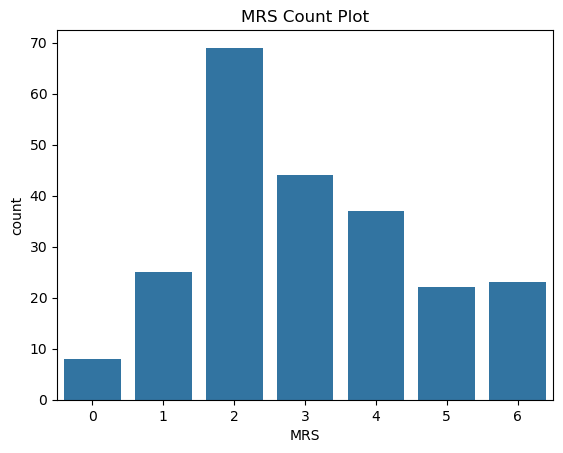

In [20]:
plt.figure()
plt.title('MRS Count Plot')
sns.countplot(data=data, x='MRS')
plt.show()

### Converting MRS to Good MRS and Bad MRS

In [21]:
# 1 = Good, 0 = Bad
data['MRS_Class'] = pd.Series()
for index, value in data['MRS'].items():
    if (value <= 2):
      data.loc[index,'MRS_Class'] = 1
    else:
      data.loc[index,'MRS_Class'] = 0

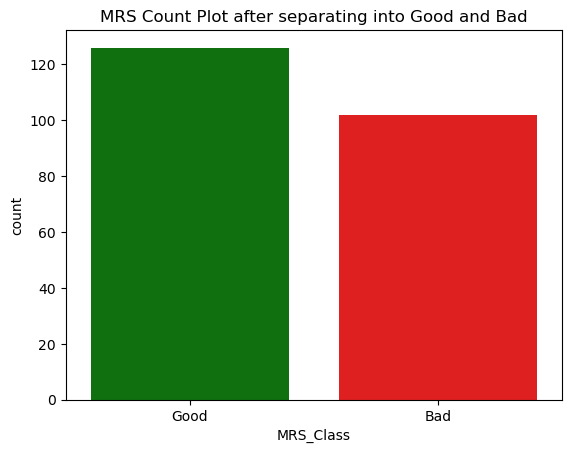

In [22]:
plt.figure()
plt.title('MRS Count Plot after separating into Good and Bad')

# Set the x variable to hue and use integer keys for the palette
sns.countplot(data=data, x='MRS_Class', hue='MRS_Class', palette={0: 'green', 1: 'red'}, legend=False)

# Set the custom x-tick labels
plt.xticks(ticks=[0, 1], labels=['Good', 'Bad'])

plt.show()

## Ajusting Columns

### Replacing M=1 and F=0

In [23]:
# Replace 'M' with 1 and 'F' with 0 in the Gender column
data["GENDER"] = data["GENDER"].replace({"M": 1, "F": 0}).astype(int)

# Verify the changes
print(data["GENDER"].unique())  # Should print [1, 0]

[1 0]


C:\Users\Aditya\AppData\Local\Temp\ipykernel_23388\2700482099.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["GENDER"] = data["GENDER"].replace({"M": 1, "F": 0}).astype(int)


In [24]:
data.reset_index(inplace=True, drop=True)

In [25]:
data.head()

,AGE,GENDER,DIABETIC,AFEBRILE,SBP,DBP,HTN,IHD,SMOKING,GLYCO HB,...,HB,NIHSS,ASPECT,CBS,MAAS,MITEFF,TAN,RLMC,MRS,MRS_Class
0,42,1,0,0,160,110,1,0,1,5.26,...,17.0,4.0,0.0,0,1,1,1,10,4,0
1,60,1,0,0,180,100,1,0,0,9.00,...,13.6,17.0,2.0,0,1,1,1,11,3,0
2,42,1,0,0,120,70,0,0,0,5.30,...,16.9,13.0,3.0,0,2,1,1,9,5,0
3,63,1,0,0,130,80,0,0,0,6.30,...,14.9,21.0,0.0,0,1,1,0,4,4,0
4,33,1,0,0,130,80,0,0,0,5.20,...,17.2,17.0,0.0,0,1,1,1,10,3,0


In [26]:
data.to_csv('Cleaned_Data.csv', index=False)
data = pd.read_csv('Cleaned_Data.csv')

## Correlation Matrix

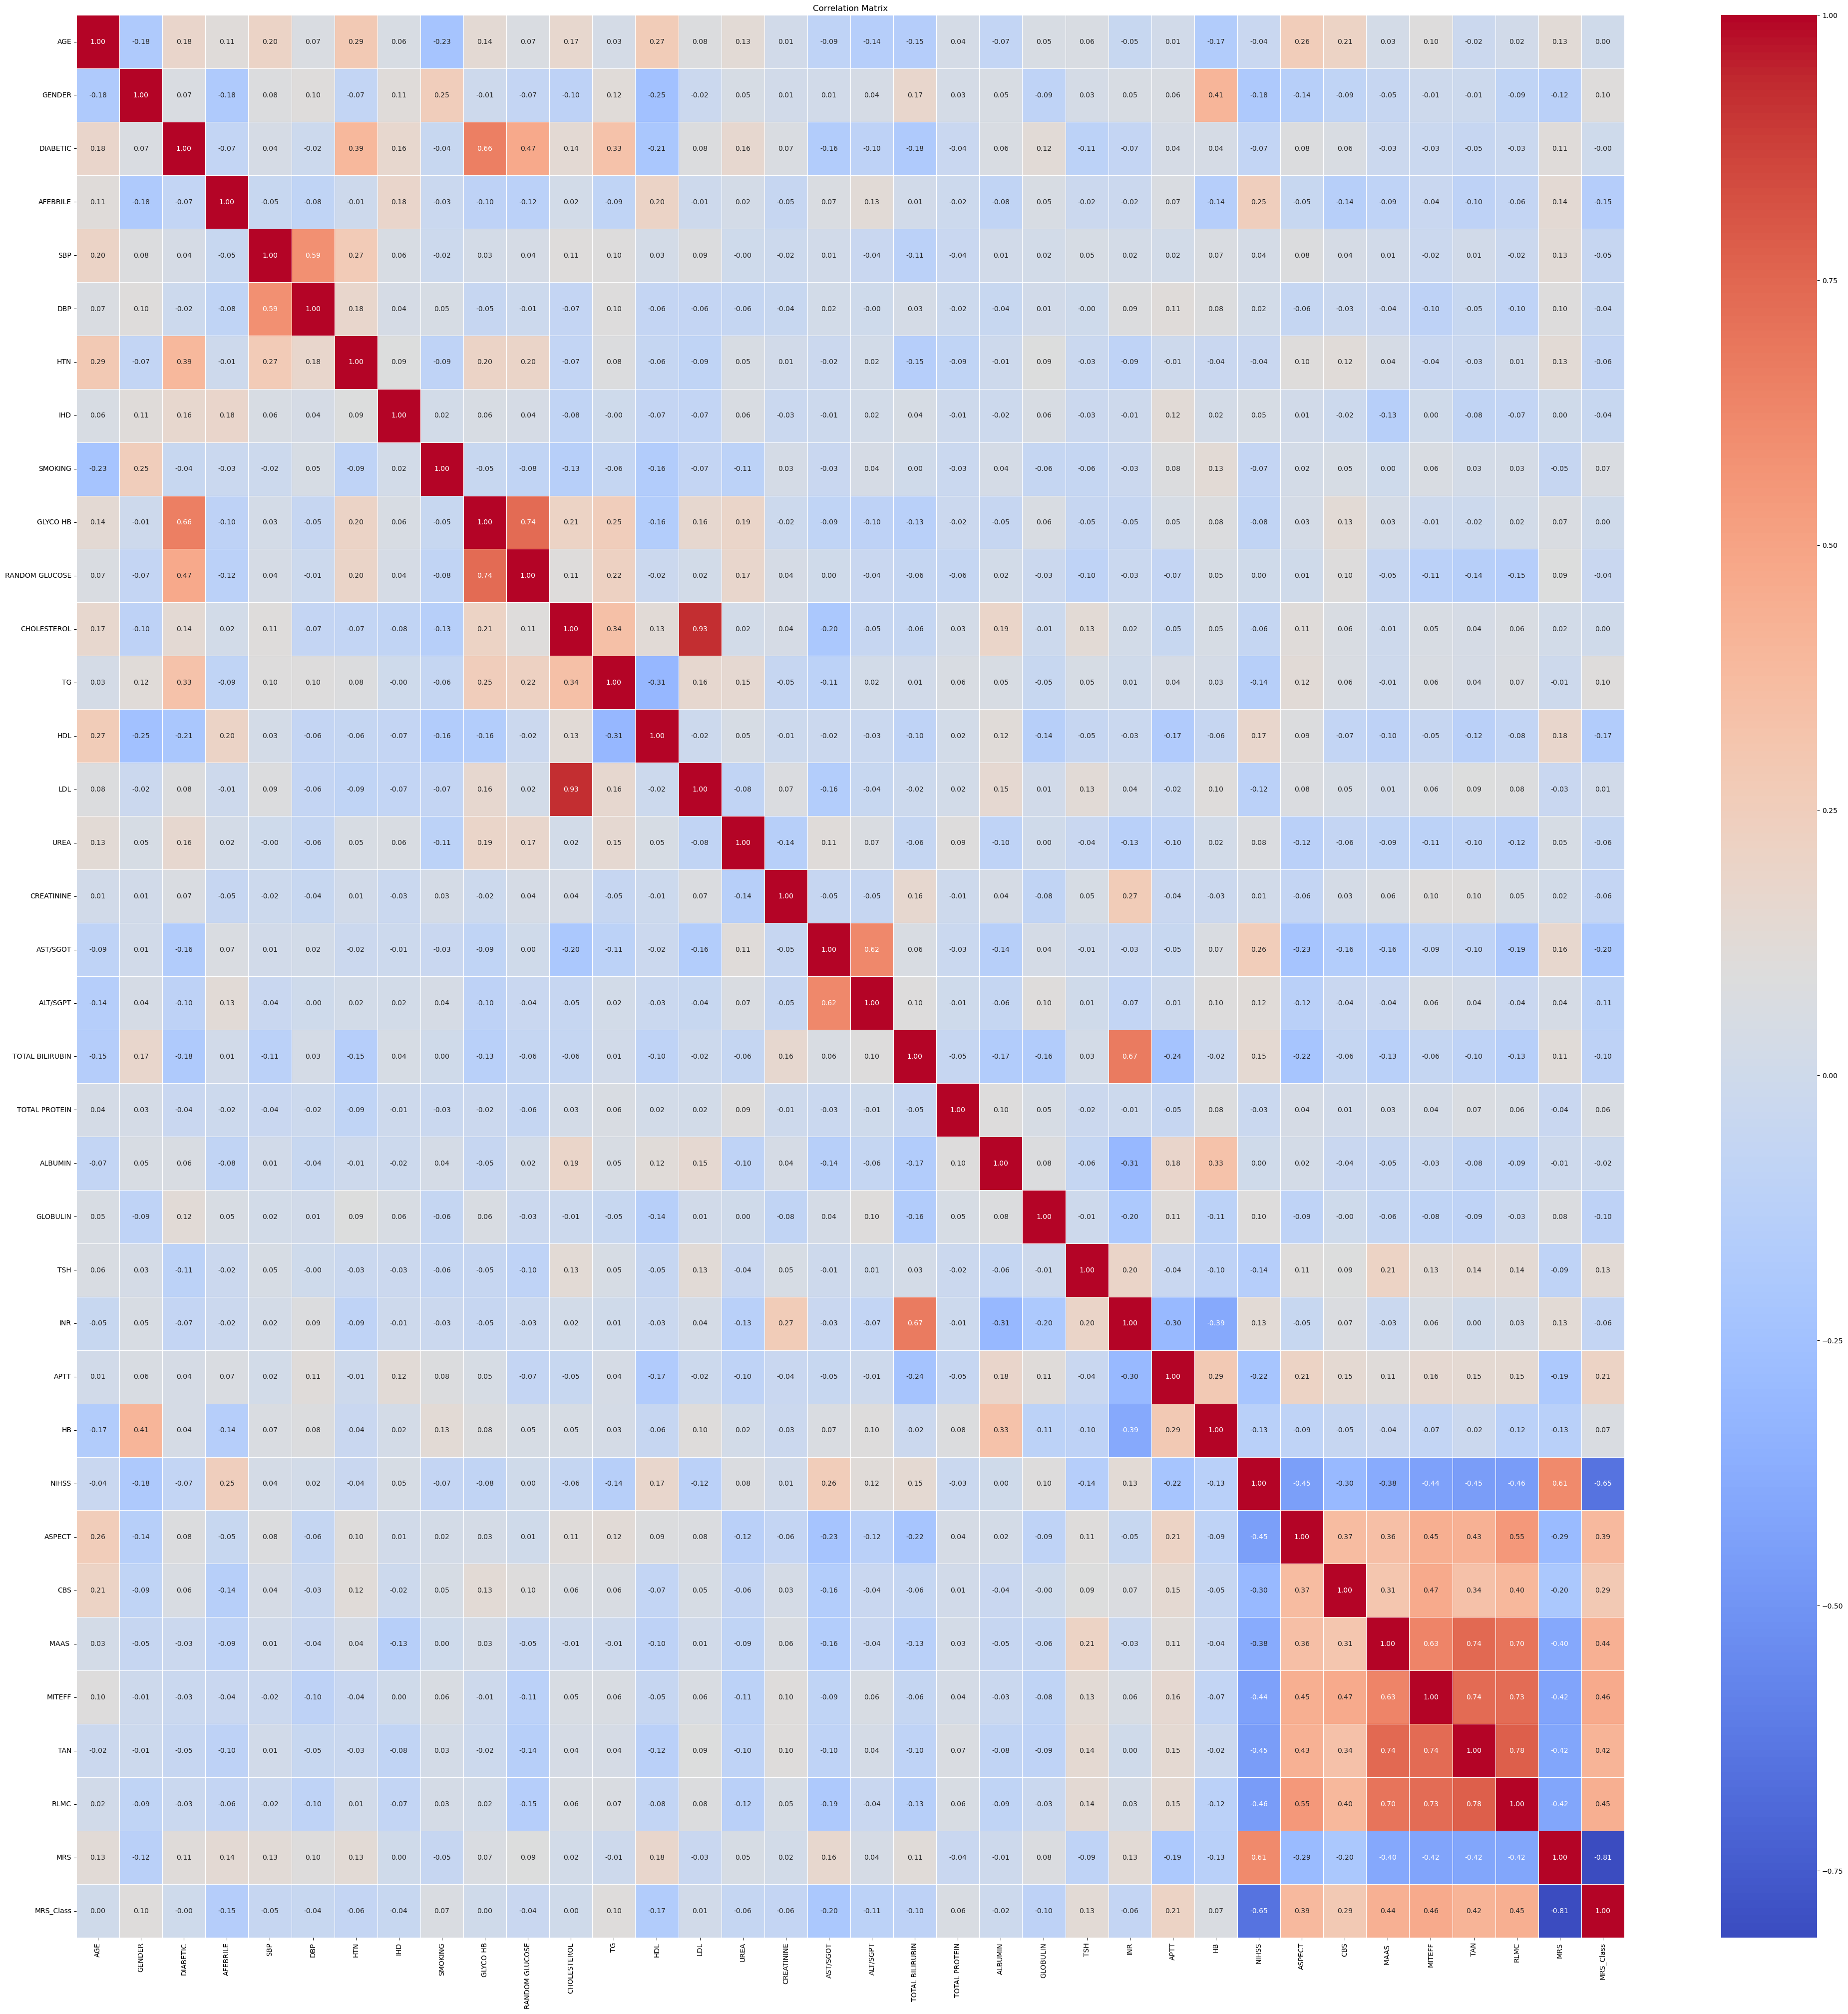

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Extraction

In [28]:
y = data.iloc[:,-1].values
X = data.drop(columns=["MRS", "MRS_Class"])
X = X.to_numpy()

In [29]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
X

array([[42.,  1.,  0., ...,  1.,  1., 10.],
       [60.,  1.,  0., ...,  1.,  1., 11.],
       [42.,  1.,  0., ...,  1.,  1.,  9.],
       ...,
       [61.,  1.,  1., ...,  3.,  3., 18.],
       [62.,  1.,  0., ...,  3.,  3., 18.],
       [69.,  1.,  0., ...,  2.,  2., 13.]])

In [31]:
X.shape

(228, 34)

## Preprocessing Pipeline

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [33]:
data.isna().sum()

AGE                 0
GENDER              0
DIABETIC            0
AFEBRILE            0
SBP                 0
DBP                 0
HTN                 0
IHD                 0
SMOKING             0
GLYCO HB           12
RANDOM GLUCOSE     10
CHOLESTEROL        40
TG                 40
HDL                40
LDL                42
UREA                1
CREATININE          1
AST/SGOT            6
ALT/SGPT            6
TOTAL BILIRUBIN     7
TOTAL PROTEIN      19
ALBUMIN            19
GLOBULIN           20
TSH                15
INR                22
APTT               30
HB                  1
NIHSS               4
ASPECT              2
CBS                 0
MAAS                0
MITEFF              0
TAN                 0
RLMC                0
MRS                 0
MRS_Class           0
dtype: int64

In [34]:
# Identify binary features
binary_features = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]
binary_features.remove('MRS_Class')

# Get indices of binary features in the DataFrame
binary_features_indices = [data.columns.get_loc(feature) for feature in binary_features]

# Create the binary transformer
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [35]:
data.columns[binary_features_indices]

Index(['GENDER', 'DIABETIC', 'AFEBRILE', 'HTN', 'IHD', 'SMOKING'], dtype='object')

In [36]:
# Identify numeric features by excluding the binary features from the DataFrame
numeric_features = [col for col in data.columns if col not in binary_features]
# Remove both 'MRS_Class' and 'MRS' in a single line
numeric_features = [feature for feature in numeric_features if feature not in ['MRS_Class', 'MRS']]

# Get indices of numeric features in the DataFrame
numeric_features_indices = [data.columns.get_loc(feature) for feature in numeric_features]

# Create the numeric transformer
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

In [37]:
data.columns[numeric_features_indices]

Index(['AGE', 'SBP', 'DBP', 'GLYCO HB', 'RANDOM GLUCOSE', 'CHOLESTEROL', 'TG',
       'HDL', 'LDL', 'UREA', 'CREATININE', 'AST/SGOT', 'ALT/SGPT',
       'TOTAL BILIRUBIN', 'TOTAL PROTEIN', 'ALBUMIN', 'GLOBULIN', 'TSH', 'INR',
       'APTT', 'HB', 'NIHSS', 'ASPECT', 'CBS', 'MAAS ', 'MITEFF', 'TAN',
       'RLMC'],
      dtype='object')

In [38]:
# Create the column transformer for the entire preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_indices),
        ("bin", binary_transformer, binary_features_indices),
    ]
)

In [39]:
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

# Prediction

## Importing Different Models

Top 7 Models:
1. LGMBClassifier
2. GradientBoostingClassifier
3. XGBoostClassifier
4. BaggingClassifier
5. AdaBoostClassifier
6. DecisionTreeClassifier
7. RandomForestClassifier


In [40]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

## Model Pipeline

In [41]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessing_pipeline),
        ('classifier', DecisionTreeClassifier())
    ]
)

## Cross Validation Pipeline

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [43]:
# Define parameters for GridSearchCV
param_grid = [
    # Parameters for Decision Tree
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10, None],
        'classifier__criterion': ['gini', 'entropy']
    },
    # Parameters for Random Forest
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 20, 30],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__bootstrap': [True]
    },
    # Parameters for AdaBoost
    {
        'classifier': [AdaBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=3)]
    },
    # Parameters for Gradient Boosting
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__max_depth': [3, 5]
    },
    # Parameters for XGBoost
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.1, 0.01]
    },
    # Parameters for LGBM
    {
        'classifier': [LGBMClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__num_leaves': [7, 15, 31]
    },
    # Parameters for Bagging Classifier
    {
        'classifier': [BaggingClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=5)]
    }
]

## Grid Search Cross Validation

In [44]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [45]:
# grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit=False, verbose=2)
# grid.fit(X, y)

In [ ]:
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit='f1', verbose=2)
grid.fit(X, y)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time

# Saving Model

In [ ]:
import joblib

# Save the entire GridSearchCV object
grid_filename = 'GSCV_NOFS_Khrityshree_Data.pkl'
joblib.dump(grid, grid_filename)

print(f"Complete GridSearchCV model saved as '{grid_filename}'")

Complete GridSearchCV model saved as 'GSCV_NOFS_Khrityshree_Data.pkl'


In [ ]:
print(grid.best_params_)

{'classifier': RandomForestClassifier(), 'classifier__bootstrap': True, 'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__n_estimators': 100}


In [ ]:
print(grid.best_score_)

0.7885017880670054


In [ ]:
from datetime import datetime

# List of scoring metrics used in GridSearchCV
scoring_metrics = ['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy']

# Extracting the parameter settings for each run and combining them into one column
params_summary = grid.cv_results_['params']
combined_params = [str(param_set) for param_set in params_summary]

# Creating an initial DataFrame with combined parameters
df = pd.DataFrame({'Parameters': combined_params})

# Adding mean scores for each scoring metric to the DataFrame
for metric in scoring_metrics:
    mean_score_key = f'mean_test_{metric}'
    
    if mean_score_key in grid.cv_results_:
        # Extract the mean scores and add to the DataFrame
        df[f'Mean {metric.capitalize()} Score'] = np.round_(grid.cv_results_[mean_score_key], 6)
    else:
        print(f"Metric '{metric}' not found in cv_results_")

# Sorting by F1 Score as it was the refit metric
df = df.sort_values(by='Mean F1 Score', ascending=False)

# Saving the DataFrame to an Excel file
current_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
result_filename = 'MRS Prediction Results Khrityshree Data with NO FS--' + current_datetime + '.xlsx'
df.to_excel(result_filename, index=False)

print(f"Results saved to {result_filename}")


Results saved to MRS Prediction Results Khrityshree Data with NO FS--26-02-2025-03-46-25.xlsx


# Confusion Matrix + Model Evaluation

## Load Libraries

In [ ]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    f1_score, recall_score, roc_auc_score, jaccard_score, 
    balanced_accuracy_score, precision_score
)
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold

## Load Best GSCV Model

In [ ]:
# Load the saved GridSearchCV object
grid_filename = 'GSCV_NOFS_Khrityshree_Data.pkl'
grid = joblib.load(grid_filename)

# Extract the best model from the loaded GridSearchCV object
best_model = grid.best_estimator_

print("Best Model Loaded Successfully!")

Best Model Loaded Successfully!


## Load and Preprocess the Data

In [ ]:
# Load your cleaned data
data = pd.read_csv('Cleaned_Data.csv')

# Separate features and target variable
y = data.iloc[:, -1].values
X = data.drop(columns=["MRS", "MRS_Class"]).to_numpy()

# # Handle missing values by imputing them
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

## Perform K-Fold CV

In [ ]:
# Perform K-Fold cross-validation with 10 splits
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Use cross_val_predict to get cross-validated predictions
y_pred = cross_val_predict(best_model, X, y, cv=kf)

print("Cross-Validation Completed!")

Cross-Validation Completed!


## Confusion Matrix

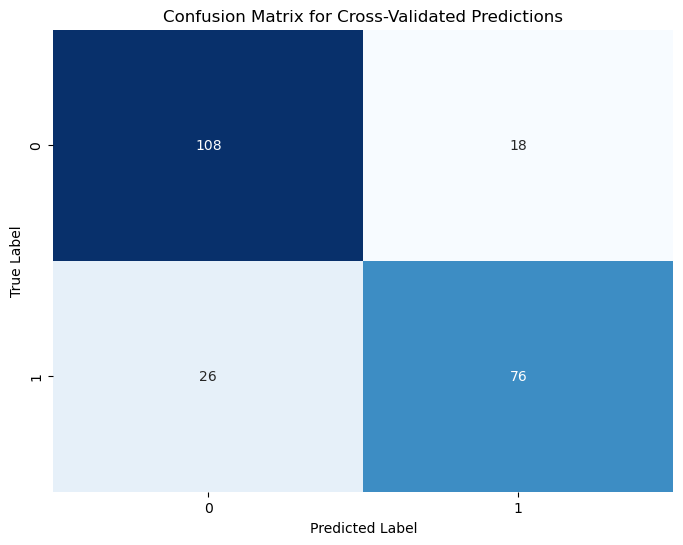

Confusion Matrix Generated and Saved!


In [ ]:
# Generate confusion matrix for cross-validated predictions
conf_matrix = confusion_matrix(y, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Cross-Validated Predictions')

# Save the plot
plt.savefig('Confusion_Matrix_Best_Performing_GSCV_FS_Khrityshree_Data_NOFS.png', dpi=300)
plt.show()

print("Confusion Matrix Generated and Saved!")

## Classification Report

In [ ]:
# Generate and print a detailed classification report for cross-validated predictions
classification_rep = classification_report(y, y_pred)
print("\nClassification Report for Cross-Validated Predictions:\n", classification_rep)


Classification Report for Cross-Validated Predictions:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       126
           1       0.81      0.75      0.78       102

    accuracy                           0.81       228
   macro avg       0.81      0.80      0.80       228
weighted avg       0.81      0.81      0.81       228



## CV Scores

In [ ]:
# Perform cross-validation on the best model to assess overfitting
# Cross-validate using 10 folds and the 'f1' scoring metric
cross_val_scores = cross_val_score(best_model, X, y, cv=kf, scoring='f1')

# Print scores
print("\nCross-Validation F1 Scores:", cross_val_scores)
print("Mean F1 Score from Cross-Validation:", np.mean(cross_val_scores))


Cross-Validation F1 Scores: [0.81818182 0.76190476 0.76190476 0.8        0.66666667 0.86956522
 0.8        0.57142857 0.73684211 0.57142857]
Mean F1 Score from Cross-Validation: 0.7357922474169614


## Extract Best Performing Models

In [ ]:
# Extract GridSearchCV results into DataFrame
df_results = pd.DataFrame(grid.cv_results_)
df_results = df_results.sort_values(by='mean_test_f1', ascending=False)

# Get unique top-performing model instances
unique_models = df_results['param_classifier'].unique()
top_models = []

for model in unique_models:
    top_model = df_results[df_results['param_classifier'] == model].head(1)
    top_models.append(top_model)

# Concatenate all top-performing unique models
top_models_df = pd.concat(top_models)

print("Top-Performing Models Extracted!")

Top-Performing Models Extracted!


## Metrics of Top Performing Models

In [ ]:
# Initialize a list to store metrics for each unique top model
metrics_list = []

# Evaluate metrics for the top-performing unique models using cross-validation
for index, row in top_models_df.iterrows():
    model_params = row['params']
    
    # Set the model with the corresponding parameters
    model = model_params['classifier']
    model.set_params(**{
        key.replace('classifier__', ''): value 
        for key, value in model_params.items() 
        if key.startswith('classifier__')
    })
    
    # Perform cross-validation and predict
    y_pred = cross_val_predict(model, X, y, cv=kf)
    
    # Calculate metrics
    metrics = {
        'Model': type(model).__name__,
        'Accuracy': accuracy_score(y, y_pred),
        'F1 Score': f1_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'ROC AUC': roc_auc_score(y, y_pred),
        'Jaccard': jaccard_score(y, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y, y_pred)
    }
    metrics_list.append(metrics)

print("Performance Metrics Computed!")

[LightGBM] [Info] Number of positive: 91, number of negative: 114
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 205, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.443902 -> initscore=-0.225339
[LightGBM] [Info] Start training from score -0.225339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 93, number of negative: 112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of 

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

Performance Metrics Computed!


## Save Metrics

In [120]:
# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Save metrics to an Excel file
metrics_filename = 'Top_Unique_Models_Metrics_Khrityshree_Data_NOFS.xlsx'
metrics_df.to_excel(metrics_filename, index=False)

print(f"Metrics saved to '{metrics_filename}'!")

Metrics saved to 'Top_Unique_Models_Metrics_Khrityshree_Data_NOFS.xlsx'!
